In [394]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [395]:
df = pd.read_csv('datasets/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [397]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [398]:
df.shape

(150, 5)

In [399]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [400]:
X = df.drop(columns='species')
y = df['species']

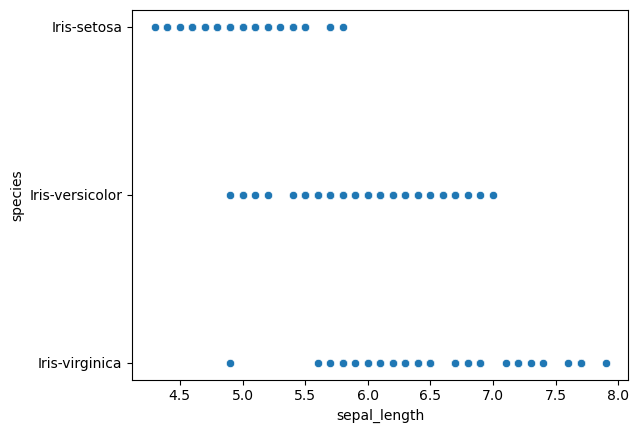

In [401]:
sns.scatterplot(data=df, x=df['sepal_length'], y=df['species'])
plt.show()

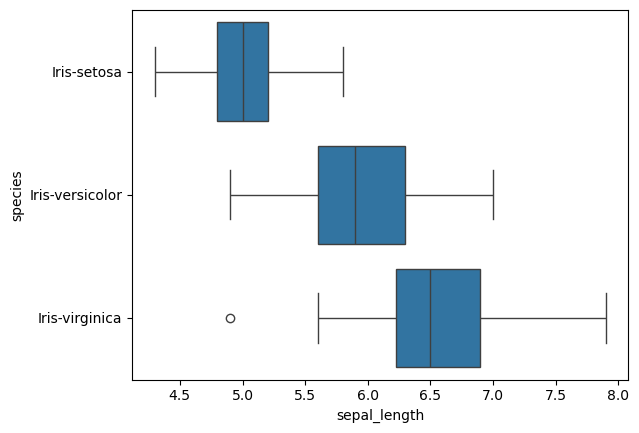

In [402]:
sns.boxplot(data=df, x=df['sepal_length'], y=df['species'])
plt.show()

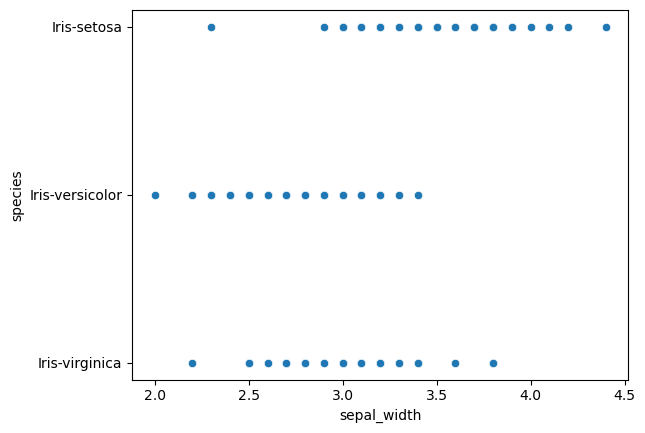

In [403]:
sns.scatterplot(data=df, x=df['sepal_width'], y=df['species'])
plt.show()

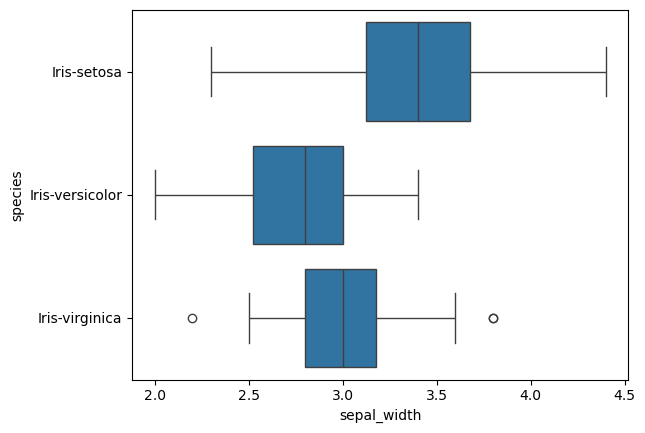

In [404]:
sns.boxplot(data=df, x=df['sepal_width'], y=df['species'])
plt.show()

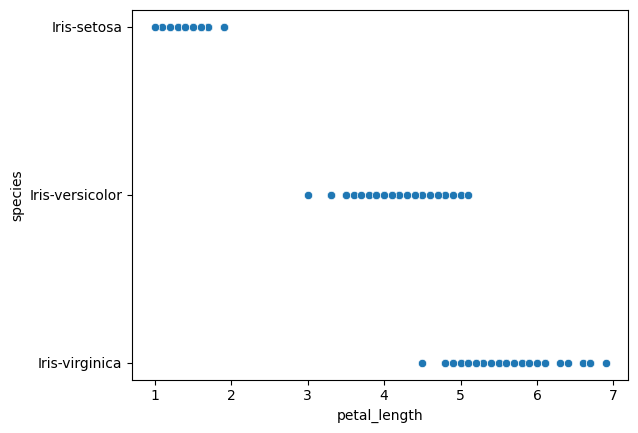

In [405]:
sns.scatterplot(data=df, x=df['petal_length'], y=df['species'])
plt.show()

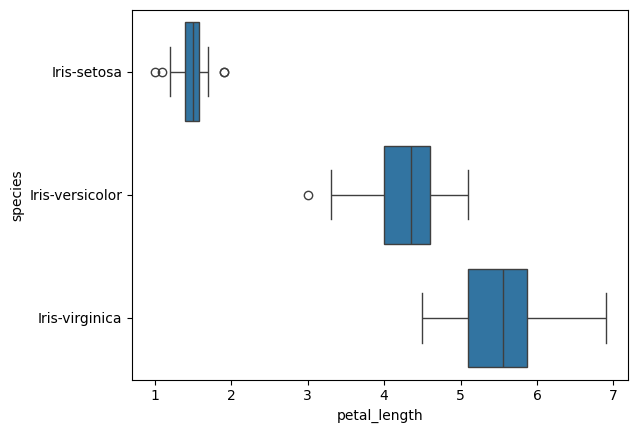

In [406]:
sns.boxplot(data=df, x=df['petal_length'], y=df['species'])
plt.show()

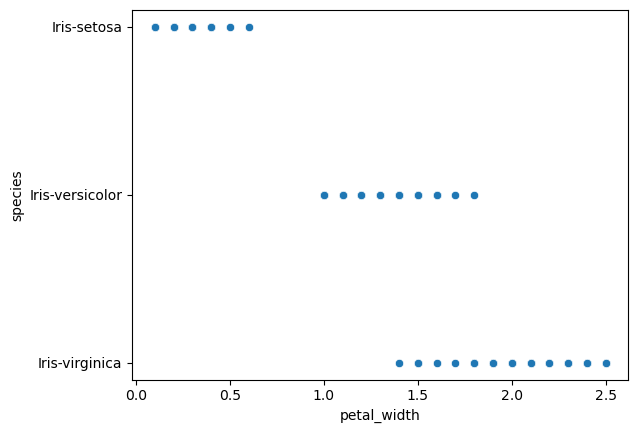

In [407]:
sns.scatterplot(data=df, x=df['petal_width'], y=df['species'])
plt.show()

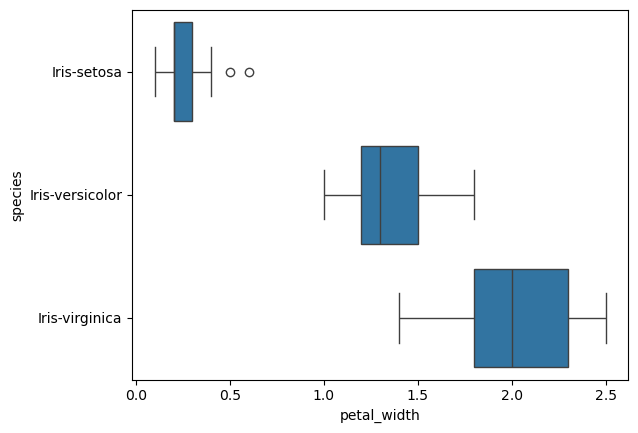

In [408]:
sns.boxplot(data=df, x=df['petal_width'], y=df['species'])
plt.show()

<Axes: xlabel='species', ylabel='Count'>

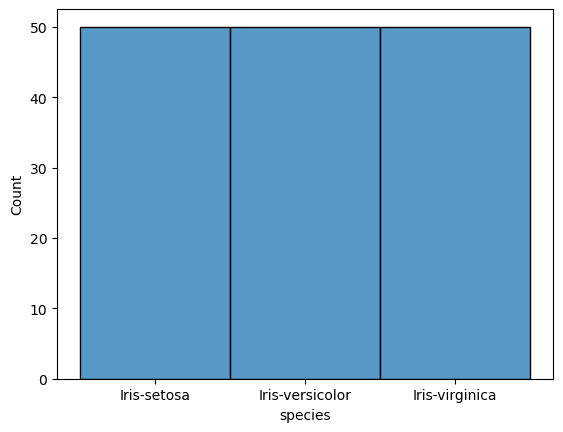

In [409]:
sns.histplot(data=df, x=df['species'])

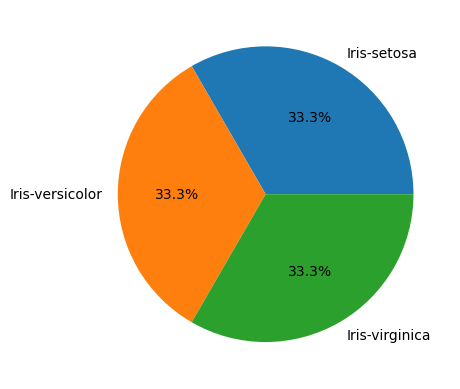

In [410]:
count = df['species'].value_counts()
plt.pie(x=count, labels=count.index, autopct='%1.1f%%')
plt.show()

In [411]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [412]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [413]:
le = LabelEncoder()
y_train_labeled = le.fit_transform(y_train)
y_test_labeled = le.transform(y_test)

In [414]:
print(X_train_scaled[:10])

[[-1.47393679  1.22037928 -1.5639872  -1.30948358]
 [-0.13307079  3.02001693 -1.27728011 -1.04292204]
 [ 1.08589829  0.09560575  0.38562104  0.28988568]
 [-1.23014297  0.77046987 -1.21993869 -1.30948358]
 [-1.7177306   0.32056046 -1.39196294 -1.30948358]
 [ 0.59831066 -1.25412249  0.72966956  0.95628954]
 [ 0.72020757  0.32056046  0.44296246  0.42316645]
 [-0.74255534  0.99542457 -1.27728011 -1.30948358]
 [-0.98634915  1.22037928 -1.33462153 -1.30948358]
 [-0.74255534  2.34515281 -1.27728011 -1.44276436]]


In [415]:
print(X_test_scaled[:10])

[[ 0.35451684 -0.57925837  0.5576453   0.02332414]
 [-0.13307079  1.67028869 -1.16259727 -1.17620281]
 [ 2.30486738 -1.02916778  1.81915651  1.48941263]
 [ 0.23261993 -0.35430366  0.44296246  0.42316645]
 [ 1.2077952  -0.57925837  0.61498672  0.28988568]
 [-0.49876152  0.77046987 -1.27728011 -1.04292204]
 [-0.2549677  -0.35430366 -0.07311031  0.15660491]
 [ 1.32969211  0.09560575  0.78701097  1.48941263]
 [ 0.47641375 -1.9289866   0.44296246  0.42316645]
 [-0.01117388 -0.80421307  0.09891395  0.02332414]]


In [416]:
print(y_train_labeled[:10])

[0 0 1 0 0 2 1 0 0 0]


In [417]:
print(y_test_labeled[:10])

[1 0 2 1 1 0 1 2 1 1]


In [418]:
rfc = RandomForestClassifier()

rfc.fit(X_train_scaled, y_train_labeled)
y_pred_rfc = rfc.predict(X_test_scaled)

print(classification_report(y_test_labeled, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [419]:
device = 'mps' if torch.mps.is_available() else 'cpu'
device

'mps'

In [420]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float).to(device)
y_train_tensor = torch.tensor(y_train_labeled, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test_labeled, dtype=torch.long).to(device)

In [421]:
class NeuralNetwork(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_features=n_inputs, out_features=16),
            nn.ReLU(),
            nn.Linear(in_features=16, out_features=n_outputs)
        )

    def forward(self, x):
        return self.net(x)
    
model = NeuralNetwork(n_inputs=X_train_tensor.shape[1], n_outputs=3).to(device)
model

NeuralNetwork(
  (net): Sequential(
    (0): Linear(in_features=4, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=3, bias=True)
  )
)

In [422]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [423]:
torch.manual_seed(42)
torch.mps.manual_seed(42)

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []


epochs = 1500

for epoch in range(epochs):
    model.train()
    y_train_logits = model(X_train_tensor)
    y_train_loss = criterion(y_train_logits, y_train_tensor)
    optimizer.zero_grad()
    y_train_loss.backward()
    optimizer.step()
    y_train_preds = torch.argmax(y_train_logits, dim=1)
    train_acc = (y_train_preds == y_train_tensor).float().mean()

    model.eval()
    with torch.inference_mode():
        y_test_logits = model(X_test_tensor)
        y_test_loss = criterion(y_test_logits, y_test_tensor)
        y_test_preds = torch.argmax(y_test_logits, dim=1)
        test_acc = (y_test_preds == y_test_tensor).float().mean()

    train_losses.append(y_train_loss.item())
    test_losses.append(y_test_loss.item())
    train_accuracies.append(train_acc.item())
    test_accuracies.append(test_acc.item())
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} || Train Loss: {y_train_loss} || Train Accuracy: {train_acc} || Test Loss: {y_test_loss} || Test Accuracy: {test_acc}")

Epoch: 0 || Train Loss: 1.0460859537124634 || Train Accuracy: 0.4000000059604645 || Test Loss: 1.0452786684036255 || Test Accuracy: 0.4000000059604645
Epoch: 100 || Train Loss: 0.5888248085975647 || Train Accuracy: 0.8500000238418579 || Test Loss: 0.5425087213516235 || Test Accuracy: 0.9333333373069763
Epoch: 200 || Train Loss: 0.3599444329738617 || Train Accuracy: 0.8999999761581421 || Test Loss: 0.29780223965644836 || Test Accuracy: 0.9333333373069763
Epoch: 300 || Train Loss: 0.24999825656414032 || Train Accuracy: 0.9333333373069763 || Test Loss: 0.199427992105484 || Test Accuracy: 1.0
Epoch: 400 || Train Loss: 0.17701925337314606 || Train Accuracy: 0.949999988079071 || Test Loss: 0.14408735930919647 || Test Accuracy: 0.9666666388511658
Epoch: 500 || Train Loss: 0.13131216168403625 || Train Accuracy: 0.9583333134651184 || Test Loss: 0.1092764362692833 || Test Accuracy: 0.9666666388511658
Epoch: 600 || Train Loss: 0.1046009212732315 || Train Accuracy: 0.9583333134651184 || Test Loss:

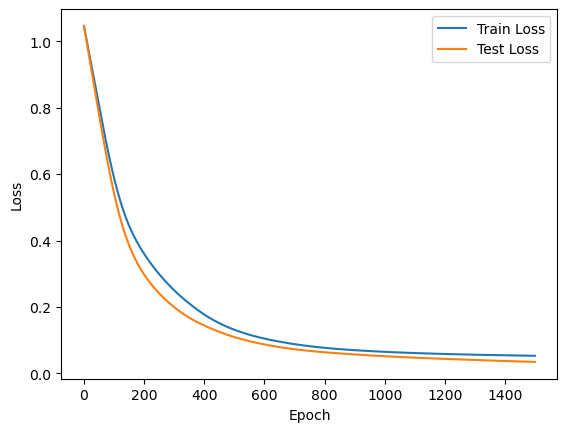

In [424]:
plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

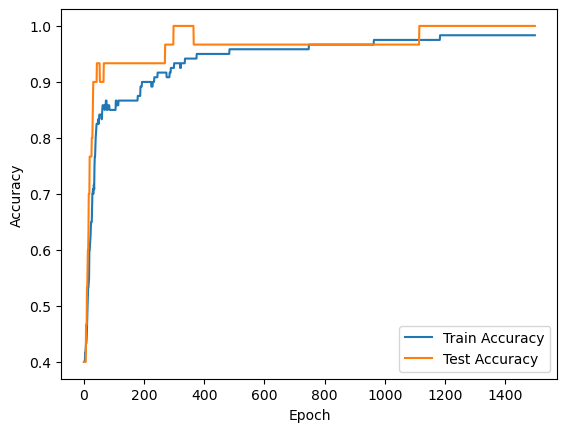

In [425]:
plt.figure()
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
